In [ ]:
#LOJİSTİK REGRESYON _ LİNEER DESTEK VEKTÖR MAKİNELERİ
#Lojistik regresyon, isminde “regresyon” geçmesine rağmen bir sınıflandırma algoritmasıdır. 
#Yani görseldeki hayvanın kedi mi, köpek mi olduğunu tahmin etme gibi iki sınıflı sınıflandırma problemlerinde sıkça kullanılır.
#Lojistik regresyonun, lineer regresyon ile arasındaki en büyük farkı iki sınıfı birbirinden ayıracak çizgiyi nasıl uyguladığıdır (fit). 
#Lineer regresyon, optimum çizgiyi çizmek için “En Küçük Kareler Yöntemi” (Least Squares) kullanırken, lojistik regresyon “Maksimum Olabilirlik” (Maximum Likelihood) kullanır.


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
kanser = load_breast_cancer()

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_egitim, X_test, y_egitim, y_test = train_test_split(kanser.data, kanser.target,
                                        stratify = kanser.target, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
logreg = LogisticRegression(solver="liblinear").fit(X_egitim, y_egitim)
#Shift + Tab ile ön tanımlı değerleri görürüz. Burada  ön tanımlı olan C=1.0 olduğunu görürüz.
#Muhtelmelen modelde under-fitting vardır. O yüzden C=100 yapalım

In [8]:
print(logreg.score(X_egitim, y_egitim))

0.9530516431924883


In [9]:
print(logreg.score(X_test, y_test))

0.958041958041958


In [10]:
logreg100 = LogisticRegression(C=100,solver="liblinear").fit(X_egitim, y_egitim)
print(logreg100.score(X_egitim, y_egitim))
print(logreg100.score(X_test, y_test))

0.9671361502347418
0.965034965034965


In [12]:
logreg001 = LogisticRegression(C=0.01,solver="liblinear").fit(X_egitim, y_egitim)
print(logreg001.score(X_egitim, y_egitim))
print(logreg001.score(X_test, y_test))

0.9342723004694836
0.9300699300699301


In [13]:
for C, market in zip([0.001,1,100],["o","^","v"]):
    lr_l1 = LogisticRegression(penalty="l1", solver ="liblinear", C=C).fit(X_egitim,y_egitim)
    print("C={:.3f} için eğitim doğruluk {:.2f}".format(C, lr_l1.score(X_egitim, y_egitim)))
    print("C={:.3f} için test doğruluk {:.2f}".format(C, lr_l1.score(X_test, y_test)))

C=0.001 için eğitim doğruluk 0.91
C=0.001 için test doğruluk 0.92
C=1.000 için eğitim doğruluk 0.96
C=1.000 için test doğruluk 0.96
C=100.000 için eğitim doğruluk 0.99
C=100.000 için test doğruluk 0.98


C:\Programing\anaconda3\envs\my_example\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
from sklearn.datasets import make_blobs
import mglearn

In [15]:
%matplotlib inline

In [16]:
X,y = make_blobs(random_state=42)

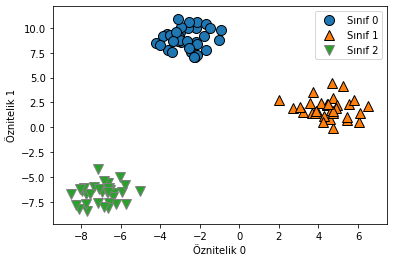

In [17]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Öznitelik 0")
plt.ylabel("Öznitelik 1")
plt.legend(["Sınıf 0","Sınıf 1","Sınıf 2"])

Destek Vektör Makineleri (Support Vector Machine) genellikle sınıflandırma problemlerinde kullanılan gözetimli öğrenme yöntemlerinden biridir. 
Bir düzlem üzerine yerleştirilmiş noktaları sınıflandırır. Bu sınıflandırmayı yapabilmek için iki sınıfı ayıran bir doğru çizilir ve bu doğrunun ±1'i arasında kalan yeşil bölgeye Margin adı verilir. 
Margin ne kadar geniş ise iki veya daha fazla sınıf o kadar iyi ayrıştırılır. İki sınıfa  ait noktaların maksimum uzaklıkta olmasını sağlamaktır. Karmaşık ama küçük ve orta ölçekteki veri setleri için uygundur.

In [19]:
from sklearn.svm import LinearSVC

In [20]:
linear_svm = LinearSVC().fit(X,y)

In [21]:
linear_svm.coef_

array([[-0.17492354,  0.23140909],
       [ 0.4762129 , -0.06937698],
       [-0.18914433, -0.20399745]])

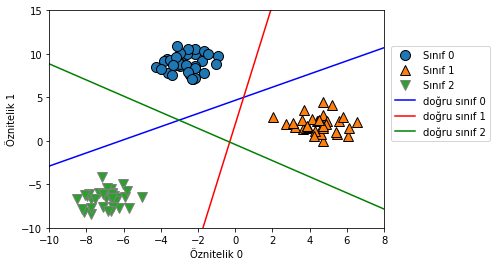

In [22]:
import numpy as np
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept,color in zip(linear_svm.coef_, linear_svm.intercept_,["b","r","g"]):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c= color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("Öznitelik 0")
plt.ylabel("Öznitelik 1")
plt.legend(["Sınıf 0","Sınıf 1","Sınıf 2","doğru sınıf 0","doğru sınıf 1","doğru sınıf 2"],
            loc = (1.02,0.4))